In [1]:
import sys, random, math

In [2]:
class Spot:
    def __init__(self, i, j):
        self.x, self.y = i, j
        self.f, self.g, self.h = 0, 0, 0
        self.neighbors = []
        self.prev = None
        self.wall = False

    def add_neighbors(self, grid):
        if self.x < cols - 1:
            self.neighbors.append(grid[self.x+1][self.y])
        if self.x > 0:
            self.neighbors.append(grid[self.x-1][self.y])
        if self.y < rows - 1:
            self.neighbors.append(grid[self.x][self.y+1])
        if self.y > 0:
            self.neighbors.append(grid[self.x][self.y-1])

In [3]:
def heuristics(a, b):
    return math.sqrt((a.x - b.x)**2 + abs(a.y - b.y)**2)

In [4]:
def boxes(grid,x,y,w,h):
    newx=x+w-1
    newy=y+h-1
    grid[x][y].wall=True
    for i in range(1,w):
        grid[x+i][y].wall=True
    for i in range(1,h):
        grid[x][y+i].wall=True
    for i in range(1,w-1):
        grid[newx-i][newy].wall=True
    for i in range(1,h):
        grid[newx][y+i].wall=True

In [23]:
def astar(grid,cols, rows, openSet, closeSet, path, start, end):
    flag = False
    noflag = True
    startflag = False
    moregrid=False
    while True:
        startflag=True
        if startflag:
            if len(openSet) > 0:
                winner = 0
                for i in range(len(openSet)):
                    if openSet[i].f < openSet[winner].f:
                        winner = i

                current = openSet[winner]

                if current == end:
                    temp = current
                    while temp.prev:# prev is a parent
                        path.append(temp.prev)
                        temp = temp.prev
                    if not flag:
                        flag = True
                        print("Done")
                        path.append(end)
                    elif flag:
                        continue

                if flag == False:
                    openSet.remove(current)
                    closeSet.append(current)

                    for neighbor in current.neighbors:
                        if neighbor in closeSet or neighbor.wall:
                            continue
                        tempG = current.g + 1

                        newPath = False
                        if neighbor in openSet:
                            if tempG < neighbor.g:
                                neighbor.g = tempG
                                newPath = True
                        else:
                            neighbor.g = tempG
                            newPath = True
                            openSet.append(neighbor)

                        if newPath:
                            neighbor.h = heuristics(neighbor, end)
                            neighbor.f = neighbor.g + neighbor.h
                            neighbor.prev = current

            else:
                if noflag:
                    moregrid=True
                    print("connection on new layer")
                    break


        if len(path)>0:
            #print('this is path',len(path))
            pathes.append(path)


        for i in range(cols):
            for j in range(rows):
                spot = grid[j][i]
                if spot in path:
                    spot.wall = True
        if flag:
            break
            
    return grid, moregrid


In [24]:
def fullgrid(newlayergrid,grid,grids,conx_start,cony_start,conx_end, cony_end,counter, cols, rows):
    openSet = []
    value=False
    for k in range(len(conx_start)):

        start=grid[conx_start[k]][cony_start[k]]
        start.wall = False
        end=grid[conx_end[k]][cony_end[k]]
        end.wall = False

        if len(openSet)>1:
            openSet = []
            closeSet = []
            path = []
        openSet=[]
        closeSet=[]
        path = []
        openSet.append(start)
        grid, moregrid=astar(grid,cols, rows, openSet, closeSet, path, start, end)
        
        if moregrid==True:
            value=True
            newlayergrid.append([conx_start[k],cony_start[k],conx_end[k],cony_end[k]])
            continue
        else:
            grids.append(grid)
        counter+=1
    if value==True:
        moregrid=True
    if moregrid==True:
        size = (width, height) = 20, 20
        cols, rows = 100, 100

        grid = []
        openSet, closeSet = [], []
        path = []
        w = width//cols
        h = height//rows
        for i in range(cols):
            arr = []
            for j in range(rows):
                arr.append(Spot(i, j))
            grid.append(arr)

        for i in range(cols):
            for j in range(rows):
                grid[i][j].add_neighbors(grid)
        newlayer=[]
#         conx_start =newlayergrid[:][0]
#         cony_start=newlayergrid[:][1]
#         conx_end=newlayergrid[:][2]
#         cony_end=newlayergrid[:][3]
        
        
        for k in range(len(newlayergrid)):
            
            conx_start.append(newlayergrid[k][0])
            cony_start.append(newlayergrid[k][1])
            conx_end.append(newlayergrid[k][2])
            cony_end.append(newlayergrid[k][3])
        print(newlayergrid)
        fullgrid(newlayer,grid,grids,conx_start,cony_start,conx_end, cony_end,counter, cols, rows)
        
#         openSet = []
#         value=False
#         for k in range(len(newlayergrid)):
            
#             start=grid[newlayergrid[k][0]][newlayergrid[k][1]]
#             start.wall = False
#             end=grid[newlayergrid[k][2]][newlayergrid[k][3]]
#             end.wall = False

#             if len(openSet)>1:
#                 openSet = []
#                 closeSet = []
#                 path = []
#             openSet=[]
#             closeSet=[]
#             path = []
#             openSet.append(start)
#             grid, moregrid=astar(grid,cols, rows, openSet, closeSet, path, start, end)
#             grids.append(grid)
        #fullgrid(grid,grids,conx_start,cony_start,conx_end, cony_end,counter, cols, rows)

    return grids

In [25]:
# def addgrid(k):    
#     size = (width, height) = 500, 500
#     cols, rows = 100, 100

#     grid = []
#     openSet, closeSet = [],[]
#     path = []
#     w = width//cols
#     h = height//rows
#     for i in range(cols):
#         arr = []
#         for j in range(rows):
#             arr.append(Spot(i, j))
#         grid.append(arr)

#     for i in range(cols):
#         for j in range(rows):
#             grid[i][j].add_neighbors(grid)
#         for k in range(1,len(conx_start)+1):

#     start=grid[conx_start[counter]][cony_start[counter]]
#     start.wall = False
#     end=grid[conx_end[counter]][cony_end[counter]]
#     end.wall = False

#     if len(openSet)>1:
#         openSet = []
#         closeSet = []
#         path = []
#     openSet=[]
#     closeSet=[]
#     path = []
#     openSet.append(start)
#     grid, moregrid=astar(grid,cols, rows, openSet, closeSet, path, start, end)
#     grids.append(grid)
#     if moregrid:
#         break
#     counter+=1


In [26]:
size = (width, height) = 20, 20
cols, rows = 100, 100

grid = []
openSet, closeSet = [], []
path = []

w = width//cols
h = height//rows

for i in range(cols):
    arr = []
    for j in range(rows):
        arr.append(Spot(i, j))
    grid.append(arr)

for i in range(cols):
    for j in range(rows):
        grid[i][j].add_neighbors(grid)
pathes=[]
count = 0
width, hight = [12, 18, 17, 16, 14, 10, 15, 16, 18, 11, 13, 15, 8, 13, 13, 17, 8, 11, 15, 9, 12, 15, 12, 17, 15, 18, 17, 14, 9, 12, 14, 16, 17, 17, 16, 16, 16, 10, 8, 18],[10, 13, 11, 13, 10, 11, 10, 11, 14, 8, 8, 9, 17, 15, 9, 11, 18, 10, 13, 8, 9, 13, 17, 12, 9, 11, 18, 13, 12, 16, 10, 11, 17, 17, 11, 18, 17, 13, 8, 8]
#width = [10, 20, 15, 10, 20,15,10,5]
#hight = [20, 15, 10, 5, 20,10,5,10]
xcord,ycord=[78, 70, 37, 38, 30, 27, 69, 74, 10, 45, 0, 56, 30, 0, 45, 10, 0, 0, 30, 58, 54, 0, 44, 38, 30, 56, 13, 55, 69, 15, 71, 58, 13, 54, 54, 28, 74, 0, 0, 71],[77, 48, 20, 63, 53, 18, 67, 37, 0, 37, 71, 11, 63, 38, 45, 14, 53, 79, 40, 48, 67, 25, 0, 76, 31, 0, 58, 76, 77, 25, 17, 37, 41, 20, 56, 0, 0, 0, 13, 27]

#xcord = [0, 20, 0, 30, 10, 30, 0, 15]
#ycord = [15, 0, 5, 25, 15, 15, 0, 0]
conx_start=[96,96,96,96,96,96,98,98,98,98,98,98,98,98,98,98]
cony_start=[20,23,27,30,35,40,43,47,50,53,57,60,70,73,75,78]
conx_end=[4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4]
cony_end=[9,11,13,15,17,19,25,30,33,37,40,43,47,50,55,60]
for i in range(len(conx_start)):
    grid[conx_start[i]][cony_start[i]].wall = True
    grid[conx_end[i]][cony_end[i]].wall = True

for i in range(1,len(width)+1):
    boxes(grid,xcord[count]+10, ycord[count]+10, width[count]-5, hight[count]-5)
    count+=1
#for i in range(0,100):
#    grid[10][0+i].wall=True
newlayergrid=[]
grids=[]
counter=0
print(len(conx_start), len(cony_start), len(conx_end), len(cony_end))
Newgrids = fullgrid(newlayergrid,grid,grids,conx_start,cony_start,conx_end, cony_end,counter, cols, rows)

16 16 16 16
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
connection on new layer
connection on new layer
Done
Done
Done
[[98, 60, 4, 43], [98, 70, 4, 47]]
Done


KeyboardInterrupt: 

In [20]:
xpath=[]
ypath=[]
count = 0
for i in pathes:
    cordx=[]
    cordy=[]
    end = len(pathes[count])
    counter=1
    for j in i:
        if end==counter:
            break
        cordx.append(j.x)
        cordy.append(j.y)
        counter+=1
    xpath.append(cordx)
    ypath.append(cordy)
    count+=1

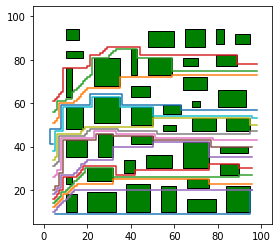

In [21]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

fig, ax = plt.subplots()
ax.plot([0,100],[100,100],color='white')

count = 0
for i in range(len(xpath)):
    plt.plot(xpath[i],ypath[i])

for i in range(1,len(width)+1):
    ax.add_patch(Rectangle((xcord[count]+10,ycord[count]+10), width[count]-5, hight[count]-5, facecolor='green', edgecolor='black'))
    count +=1
#display plot
plt.axis("scaled")
plt.show()

In [12]:
newlayergrid=[[98, 61, 41, 4], [98, 60, 4, 43]]

In [70]:
len(newlayergrid)

conx_start=[]

In [71]:
for k in range(len(newlayergrid)):

    conx_start.append(newlayergrid[k][0])
    cony_start.append(newlayergrid[k][1])
    conx_end.append(newlayergrid[k][2])
    cony_end.append(newlayergrid[k][3])

In [72]:
conx_start

[98, 98]